In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
def plot(model, classes, X_train, y_train, X_test, y_test):
    
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(
        model, classes=classes
    )
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show()
    
    # Instantiate the visualizer with the classification model
    confusion_matrix(
        model,
        X_train, y_train, X_test, y_test,
        classes=classes,
    )
    
    # Instantiate the visualizer with the classification model
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    visualizer = ClassificationReport(model, classes=classes, support=True)

    visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure

In [27]:
df = pd.read_csv('../data/processed/data.csv', index_col=[0])

In [28]:
df.shape

(432, 36)

In [29]:
df.columns

Index(['n_page', 'page_height', 'page_width', 'n_block', 'block_vert',
       'block_confidence', 'n_paragraph', 'paragraph_vert',
       'paragraph_confidence', 'n_word', 'word_vert', 'word_confidence',
       'text', 'symbol_search_pos', 'n_symbol_search_find', 'y', 'block_area',
       'paragraph_area', 'word_area', 'block_weigh', 'paragraph_weigh',
       'word_weigh', 'rel_word_block_area', 'rel_word_parag_area',
       'rel_parag_block_area', 'text_join', 'prev_symbol', 'next_symbol',
       'text_type', 'prev_text_type', 'next_text_type', 'text_len',
       'is_a_symbol', 'text_numbers', 'number_type', 'number'],
      dtype='object')

In [30]:
features = [
            'block_confidence',
            'paragraph_confidence',
            'word_confidence',
            'block_weigh',
            'paragraph_weigh',
            'word_weigh',
            'rel_word_block_area',
            'rel_word_parag_area',
            'rel_parag_block_area',
            'prev_symbol',
            'next_symbol',
            'text_type',
            'prev_text_type',
            'next_text_type',
            'text_len',
            'is_a_symbol',
            'number_type',
           ]

In [31]:
X = df[features].copy()

In [32]:
X.sample(7).T

,428,199,419,98,367,348,26
block_confidence,0.990000,0.910000,0.99,0.860000,0.690000,0.950000,0.980000
paragraph_confidence,0.990000,0.910000,0.99,0.860000,0.600000,0.960000,0.980000
word_confidence,0.990000,0.930000,0.99,0.270000,0.670000,0.930000,0.950000
block_weigh,0.084029,1.000000,1.00,1.000000,0.263837,0.545137,0.078814
paragraph_weigh,0.084029,1.000000,1.00,1.000000,0.093088,0.180971,0.303223
word_weigh,0.001553,0.507777,1.00,0.113342,0.068182,0.136468,0.034267
rel_word_block_area,0.018477,0.187303,1.00,0.095790,0.146680,0.185034,0.084558
rel_word_parag_area,0.018477,0.187303,1.00,0.095790,0.415730,0.557377,0.084558
rel_parag_block_area,1.000000,1.000000,1.00,1.000000,0.352825,0.331973,1.000000
prev_symbol,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [130]:
y = df['y'].copy()

In [34]:
y.sample(7)

31     0
430    0
314    1
418    0
294    0
369    0
115    0
Name: y, dtype: int64

In [35]:
X.isna().sum()

block_confidence        0
paragraph_confidence    0
word_confidence         0
block_weigh             0
paragraph_weigh         0
word_weigh              0
rel_word_block_area     0
rel_word_parag_area     0
rel_parag_block_area    0
prev_symbol             0
next_symbol             0
text_type               0
prev_text_type          0
next_text_type          0
text_len                0
is_a_symbol             0
number_type             0
dtype: int64

In [36]:
test_size = 0.2

In [37]:
#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

In [38]:
classes = ['not_price', 'price']

In [39]:
model = AdaBoostClassifier()

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


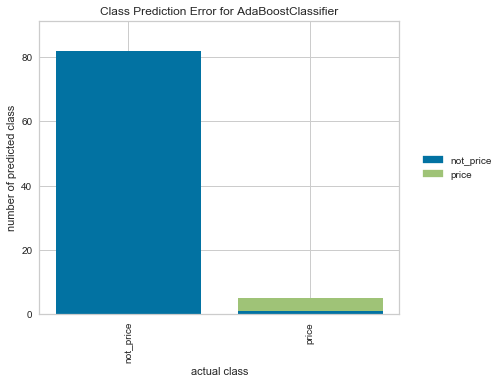

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


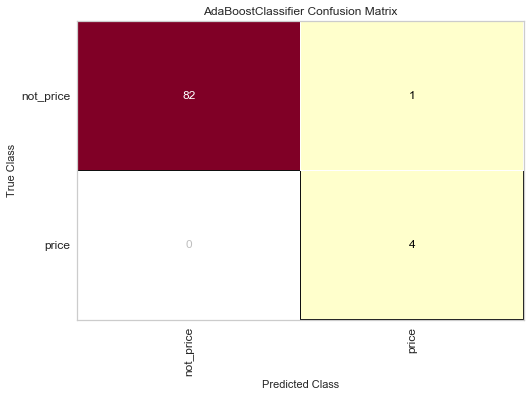

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


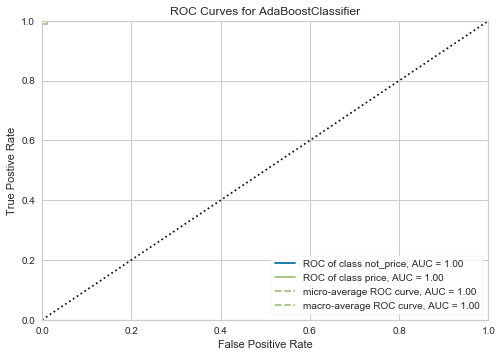

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


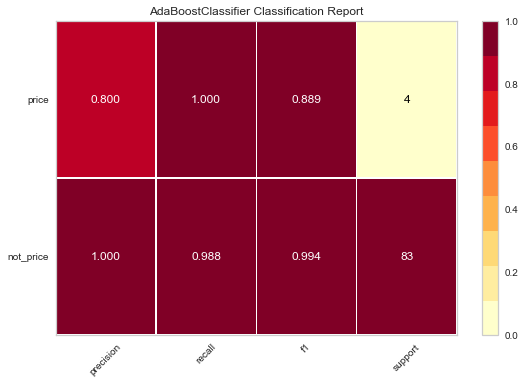

In [40]:
plot(model, classes, X_train, y_train, X_test, y_test)

In [41]:
model = RandomForestClassifier()

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


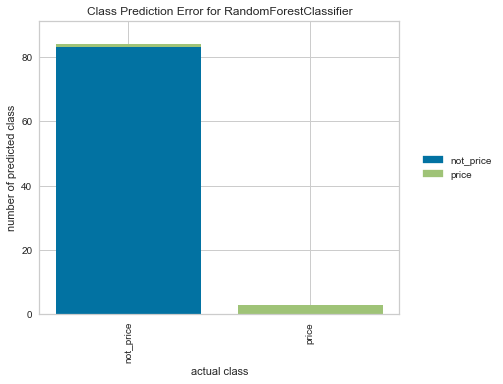

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


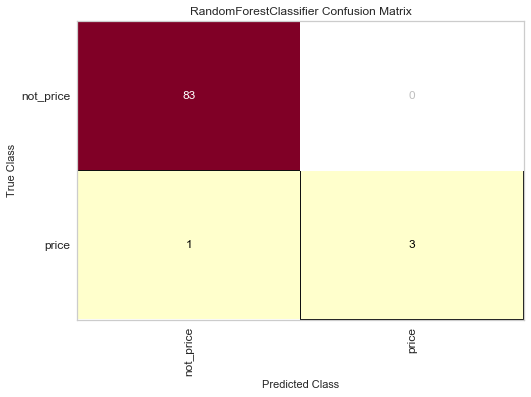

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


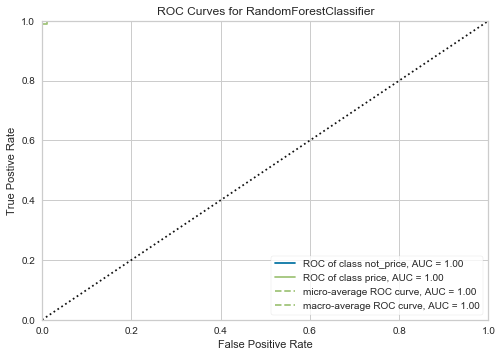

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


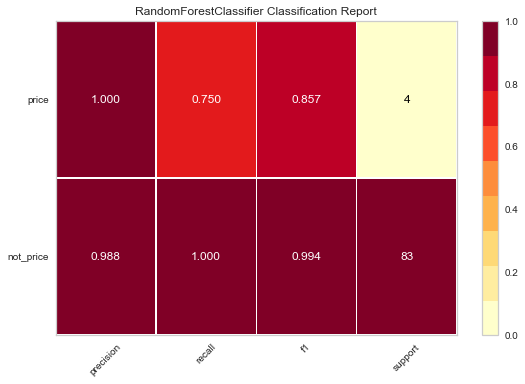

In [42]:
plot(model, classes, X_train, y_train, X_test, y_test)

In [43]:
model = GradientBoostingClassifier()

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


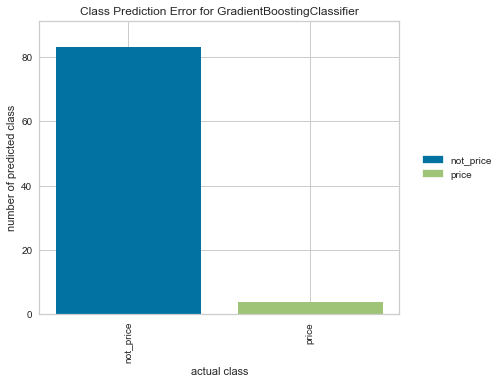

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


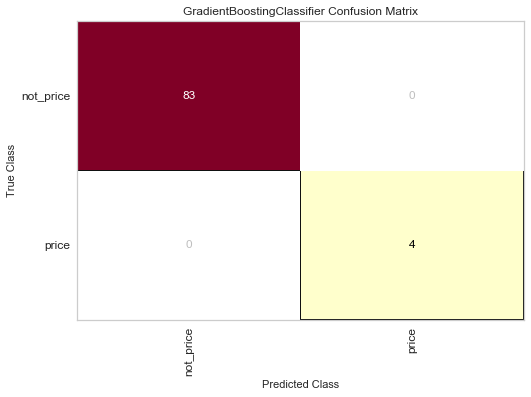

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


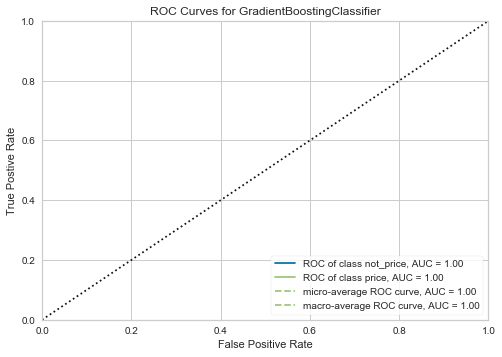

C:\Users\scors\.conda\envs\raxar\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


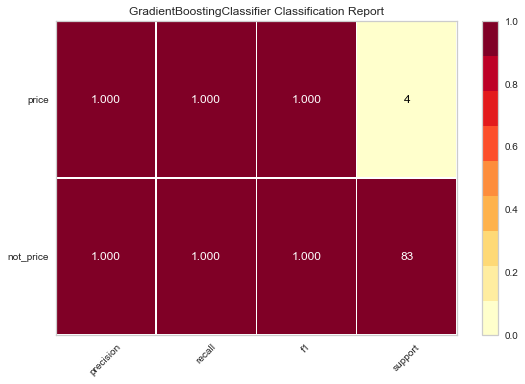

In [44]:
plot(model, classes, X_train, y_train, X_test, y_test)

In [45]:
model = XGBClassifier()

In [46]:
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[83  0]
 [ 0  4]]


In [49]:
skf = StratifiedKFold(n_splits=4, shuffle=True)
skf.get_n_splits(X.values, y.values)

4

AdaBoost

In [50]:
model = AdaBoostClassifier()

In [51]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 0.9420289855072463
- confusion_matrix
[[103   1]
 [  0   4]]
f1: 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 0.9521064301552107
- confusion_matrix
[[102   1]
 [  0   5]]
f1: 1.0
- confusion_matrix
[[103   0]
 [  0   5]]


In [52]:
model = AdaBoostClassifier()

In [53]:
param_grid = {
            'base_estimator': [DecisionTreeClassifier(max_depth=1), 
                               DecisionTreeClassifier(max_depth=2),
                               DecisionTreeClassifier(max_depth=3)],
            'n_estimators': np.arange(1,100,2),
            'learning_rate': [0.01, 0.1, 0.5, 1],
             }

In [54]:
grid_cv = GridSearchCV(model, param_grid=param_grid, scoring ='f1', cv=skf.split(X,y))

In [55]:
grid_cv.fit(X.values, y.values)
grid_cv.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 59}

In [56]:
model = AdaBoostClassifier(**grid_cv.best_params_)

In [57]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
    print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [59]:
fit_model = model.fit(X_train, y_train)

In [60]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[83  0]
 [ 0  4]]


Random Forest

In [61]:
model = RandomForestClassifier()

In [62]:
param_grid = { 
                'n_estimators': [5, 10, 25, 50, 75, 100, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [None, 1, 3, 5, 10]
            
            }

In [63]:
grid_cv = GridSearchCV(model, param_grid=param_grid, scoring ='f1', cv=skf.split(X,y))

In [64]:
grid_cv.fit(X.values, y.values)
grid_cv.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}

In [65]:
model = RandomForestClassifier(**grid_cv.best_params_)

In [66]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
    print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 0.9261790840738209
- precision: 0.9952380952380953
- recall 0.875
- confusion_matrix
[[104   0]
 [  1   3]]
f1: 0.8701923076923076
- precision: 0.9904761904761905
- recall 0.8
- confusion_matrix
[[103   0]
 [  2   3]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [68]:
fit_model = model.fit(X_train, y_train)

In [69]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[83  0]
 [ 0  4]]


XG Boost

In [70]:
model = XGBClassifier()

In [71]:
param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

In [72]:
grid_cv = GridSearchCV(model, param_grid=param_grid, scoring ='f1', cv=skf.split(X,y))

In [73]:
grid_cv.fit(X.values, y.values)
grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [74]:
model = RandomForestClassifier(**grid_cv.best_params_)

In [75]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
    print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 0.9261790840738209
- precision: 0.9952380952380953
- recall 0.875
- confusion_matrix
[[104   0]
 [  1   3]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]
f1: 0.8701923076923076
- precision: 0.9904761904761905
- recall 0.8
- confusion_matrix
[[103   0]
 [  2   3]]


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [77]:
fit_model = model.fit(X_train, y_train)

In [78]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 0.6911242603550296
- precision: 0.9825581395348837
- recall 0.625
- confusion_matrix
[[83  0]
 [ 3  1]]


Gradient Boosting

In [79]:
model = GradientBoostingClassifier()

In [80]:
param_grid = {
                "min_samples_split": np.linspace(0.1, 0.5, 3),
                "min_samples_leaf": np.linspace(0.1, 0.5, 3),
                "max_depth":[3,5,8],
                "n_estimators":[2, 5, 10, 15]
                }

In [81]:
grid_cv = GridSearchCV(model, param_grid=param_grid, scoring ='f1', cv=skf.split(X,y))

In [82]:
grid_cv.fit(X.values, y.values)
grid_cv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 15}

In [83]:
model = GradientBoostingClassifier(**grid_cv.best_params_)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [85]:
fit_model = model.fit(X_train, y_train)

In [86]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 0.9255774165953807
- precision: 0.9940476190476191
- recall 0.875
- confusion_matrix
[[83  0]
 [ 1  3]]


In [87]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
    print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 0.9261790840738209
- precision: 0.9952380952380953
- recall 0.875
- confusion_matrix
[[104   0]
 [  1   3]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]
f1: 0.8701923076923076
- precision: 0.9904761904761905
- recall 0.8
- confusion_matrix
[[103   0]
 [  2   3]]


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [89]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 0.9255774165953807
- precision: 0.9940476190476191
- recall 0.875
- confusion_matrix
[[83  0]
 [ 1  3]]


#### Final Model

**Ada Boost**

In [134]:
model = AdaBoostClassifier()

In [135]:
param_grid = {
            'base_estimator': [DecisionTreeClassifier(max_depth=1), 
                               DecisionTreeClassifier(max_depth=2),
                               DecisionTreeClassifier(max_depth=3),
                               DecisionTreeClassifier(max_depth=4),
                              ],
            'n_estimators': np.arange(1,200,2),
            'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
             }

In [136]:
skf = StratifiedKFold(n_splits=4, shuffle=True)
skf.get_n_splits(X.values, y.values)

4

In [137]:
grid_cv = GridSearchCV(model, param_grid=param_grid, scoring ='f1', cv=skf.split(X,y))

In [138]:
grid_cv.fit(X.values, y.values)
grid_cv.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 59}

In [176]:
model = AdaBoostClassifier(**grid_cv.best_params_)

In [177]:
for train_index, test_index in skf.split(X.values, y.values):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
    print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
    print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
    print('- confusion_matrix')
    print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[104   0]
 [  0   4]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]
f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[103   0]
 [  0   5]]


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=test_size, stratify=y.values)

In [186]:
fit_model = model.fit(X_train, y_train)

In [187]:
y_pred = fit_model.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred, average='macro'))
print('- precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('- recall', metrics.recall_score(y_test, y_pred, average='macro'))
print('- confusion_matrix')
print( metrics.confusion_matrix(y_test, y_pred))

f1: 1.0
- precision: 1.0
- recall 1.0
- confusion_matrix
[[83  0]
 [ 0  4]]


In [188]:
model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [189]:
classification_model = {'df': df,
                         'X': X,
                         'y': y,
                         'model':model
                         }

In [190]:
import pickle
# save model
with open('../models/classification_model.pkl', 'wb') as f:
    pickle.dump(classification_model, f)

In [191]:
with open('../models/classification_model.pkl', 'rb') as f:
    classification_model = pickle.load(f)

In [192]:
classification_model['model']

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [193]:
y_pred = classification_model['model'].predict(X.values)

In [194]:
df['predict'] = y_pred

In [195]:
y_prob = classification_model['model'].predict_proba(X.values)

In [196]:
df['predict_prob'] = y_prob

In [197]:
df.columns

Index(['n_page', 'page_height', 'page_width', 'n_block', 'block_vert',
       'block_confidence', 'n_paragraph', 'paragraph_vert',
       'paragraph_confidence', 'n_word', 'word_vert', 'word_confidence',
       'text', 'symbol_search_pos', 'n_symbol_search_find', 'y', 'block_area',
       'paragraph_area', 'word_area', 'block_weigh', 'paragraph_weigh',
       'word_weigh', 'rel_word_block_area', 'rel_word_parag_area',
       'rel_parag_block_area', 'text_join', 'prev_symbol', 'next_symbol',
       'text_type', 'prev_text_type', 'next_text_type', 'text_len',
       'is_a_symbol', 'text_numbers', 'number_type', 'number', 'predict',
       'predict_prob'],
      dtype='object')

In [198]:
df[df['predict']==1][['text_join', 'number', 'predict_prob', 'predict']]

,text_join,number,predict_prob,predict
22,87.50,87.5,0.000084,1
54,87.50,87.5,0.000084,1
74,152,152.0,0.000084,1
100,122,122.0,0.000084,1
112,122,122.0,0.000084,1
123,87,87.0,0.000084,1
146,87,87.0,0.000084,1
172,87,87.0,0.000084,1
201,152,152.0,0.000084,1
230,152,152.0,0.000084,1


In [199]:
df['predict_prob'].describe()

count    432.000000
mean       0.958123
std        0.200046
min        0.000084
25%        0.999999
50%        1.000000
75%        1.000000
max        1.000000
Name: predict_prob, dtype: float64

In [203]:
df[df['predict_prob']==df['predict_prob'].min()].shape

(18, 38)